# Q1a

In [8]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# read in data from the file
df = pd.read_csv('LoanProfile.csv').dropna()
df.head() # show the first five values


,age,credit,default
0,36,2.777700,N
1,27,0.182512,N
2,25,0.252356,N
3,52,3.929600,N
4,37,1.715901,N


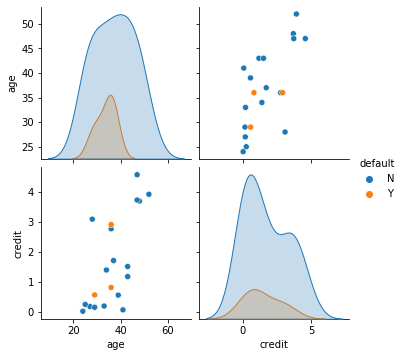

In [4]:
X = df.iloc[:,:-1]
y = df['default']
sb.pairplot (df, hue='default')
plt.show()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
logReg = LogisticRegression(solver = 'lbfgs',dual=False, 
                            multi_class = 'multinomial', random_state = 42,max_iter=5000)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)


In [14]:
X_test

,age,credit
0,36,2.777700
17,24,0.025074
15,41,0.071060
1,27,0.182512
8,43,1.181952


In [12]:
print('ACCURACY  SCORE basis training data : {0}'.format(accuracy_score(y_train,
                                                        logReg.predict(X_train))))
print('ACCURACY  SCORE basis test data: {0}'.format(accuracy_score(y_test, y_pred)))

print('CONFUSION MATRIX basis training data:')
print(confusion_matrix (y_train, logReg.predict(X_train)))

print('CONFUSION MATRIX basis testing data:')
print(confusion_matrix(y_test, y_pred))


ACCURACY  SCORE basis training data : 0.8
ACCURACY  SCORE basis test data: 1.0
CONFUSION MATRIX basis training data:
[[12  0]
 [ 3  0]]
CONFUSION MATRIX basis testing data:
[[5]]


In [15]:
# predict y when x1 = 35 and x2 = 2.7777
print(logReg.predict([[35, 2.7777]]))

['N']


In [ ]:

# logReg = LogisticRegression(solver = 'lbfgs')

# x = df[['age', 'sleep']]
# y = df['infected']    # Classification : infected = 0 or 1

# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
# x_train.head()

# logReg.fit(x_train, y_train)

# # predict y when x1 = 7.5 and x2 = 0.65
# logReg.predict([[7.5,0.65]])  

# # predict y when x1 = 10 and x2 = 0.74
# print(logReg.predict([[10, 0.74]]))

# # probability of getting 0 versus 1
# logReg.predict_proba(x_test)

# # probability of getting 0 versus 1
# logReg.predict_proba([[10, 0.74]])

# Q2a

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d

dataset = pd.read_csv('SampleK-Means.csv')
x = dataset.iloc[:, :].values

# apply kmeans to the dataset
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(x)
print(clusters)

[1 1 0 1 0]


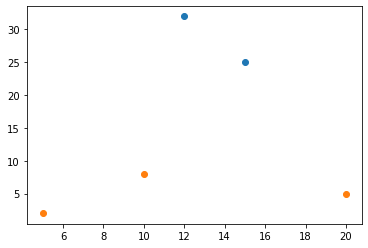

In [21]:
# plot clustered data
for i in np.unique(clusters):
    plt.scatter(x=x[clusters==i,0], y=x[clusters==i,1],
                label='Cluster ' + str(i + 1))




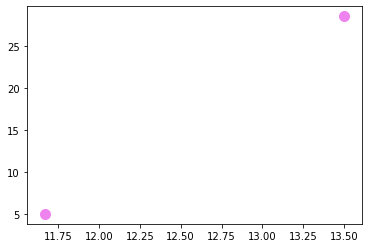

In [22]:
# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1],
            s=100, c='violet', label='Centroids')

No handles with labels found to put in legend.


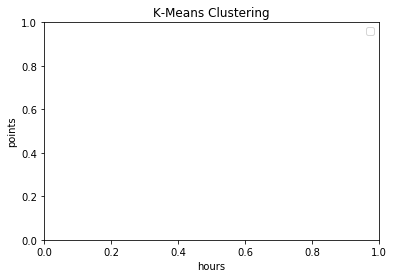

In [24]:
plt.title('K-Means Clustering')
plt.xlabel(dataset.columns[0])
plt.ylabel(dataset.columns[1])
plt.legend()
plt.show()

centers =  [[13.5        28.5       ]
 [11.66666667  5.        ]]
centers =  [13.5        11.66666667]


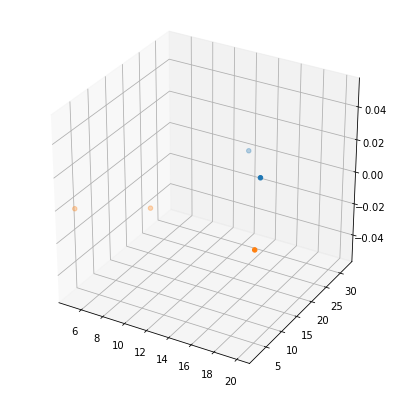

In [25]:
# 3d plot
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    ax.scatter3D(xs=x[clusters==i,0],
             ys=x[clusters==i,1],
              label='Cluster ' + str(i + 1))

print('centers = ', kmeans.cluster_centers_)
print('centers = ', kmeans.cluster_centers_[:,0])


No handles with labels found to put in legend.


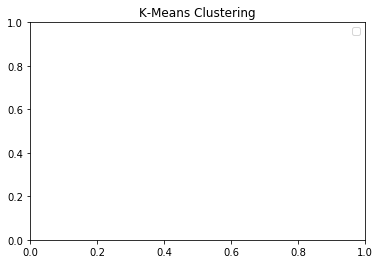

In [30]:
# plotting the centroids of the clusters
ax.scatter3D(xs=kmeans.cluster_centers_[:, 0], 
            ys=kmeans.cluster_centers_[:,1],
             s=100, c='violet', label='Centroids')
plt.title('K-Means Clustering')
ax.set_xlabel(dataset.columns[0])
ax.set_ylabel(dataset.columns[1])
plt.legend()
plt.show()



C:\python\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


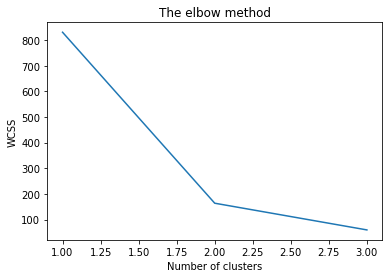

In [36]:
# part 2: Find the optimum number of clusters for k-means
# using within-cluster sum of squares (wcss)
wcss = []

# trying kmeans for k=1 to k=3
for i in range(1, 4):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X=x)
    wcss.append(kmeans.inertia_)

# plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 4), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()

# Q3a

In [48]:
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


#nltk.download('stopwords') # remove it in your system
#nltk.download('wordnet') # ditto above


In [77]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words ('english')

docs= [
        'Life is the sum of our choices.',
        'You attract into your life that which you are.',
        'Dont be afraid your life will end, be afraid that it will never begin.']


In [83]:
# data cleansing
docs_clean = []
punc = str.maketrans('','', string.punctuation)
for doc in docs:
    doc_no_punc = doc.translate(punc)
    words = doc_no_punc. lower().split()
    words = [lemmatizer.lemmatize (word, 'v')
            for word in words if word not in stop_words]
    docs_clean.append(' '.join(words))
print(docs_clean)

['life sum choices', 'attract life', 'dont afraid life end afraid never begin']


In [84]:

tfidf_vec = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidf_vec.fit_transform(docs_clean).toarray()
print(tfidf_wm)

df_index = ['doc'+str(i) for i in range(len(docs))]
#print(df_index)

df_columns = tfidf_vec.get_feature_names()
#print(df_columns)

tfidf_df = pd.DataFrame(data=tfidf_wm, index=df_index, columns=df_columns)
print(tfidf_df)

[[0.         0.         0.         0.65249088 0.         0.
  0.38537163 0.         0.65249088]
 [0.         0.861037   0.         0.         0.         0.
  0.50854232 0.         0.        ]
 [0.69217714 0.         0.34608857 0.         0.34608857 0.34608857
  0.20440549 0.34608857 0.        ]]
        afraid   attract     begin   choices      dont       end      life  \
doc0  0.000000  0.000000  0.000000  0.652491  0.000000  0.000000  0.385372   
doc1  0.000000  0.861037  0.000000  0.000000  0.000000  0.000000  0.508542   
doc2  0.692177  0.000000  0.346089  0.000000  0.346089  0.346089  0.204405   

         never       sum  
doc0  0.000000  0.652491  
doc1  0.000000  0.000000  
doc2  0.346089  0.000000  


In [80]:
bow = CountVectorizer()
feature_vectors = bow.fit_transform(docs_clean).toarray()
vocab = bow.get_feature_names()

df = pd.DataFrame(data=feature_vectors,index=df_index,columns=vocab)
print(df)


      afraid  attract  begin  choices  dont  end  life  never  sum
doc0       0        0      0        1     0    0     1      0    1
doc1       0        1      0        0     0    0     1      0    0
doc2       2        0      1        0     1    1     1      1    0


# Q2

In [89]:
# data cleansing
list1=['life','afraid']
docs_clean = []
punc = str.maketrans('','', string.punctuation)
for doc in docs:
    doc_no_punc = doc.translate(punc)
    words = doc_no_punc. lower().split()
    words = [lemmatizer.lemmatize (word, 'v')
            for word in words if word not in stop_words]
    words1 = [lemmatizer.lemmatize (word, 'v')
            for word in words if word in list1]
    docs_clean.append(' '.join(words1))

print(docs_clean)

['life', 'life', 'afraid life afraid']


In [92]:

tfidf_vec = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidf_vec.fit_transform(docs_clean).toarray()
#print(tfidf_wm)

df_index1 = ['doc'+str(i) for i in range(len(docs))]
#print(df_index1)

df_columns1 = ['life','afraid']
#print(df_columns1)

tfidf_df1 = pd.DataFrame(data=tfidf_wm, index=df_index1, columns=df_columns1)
print(tfidf_df1)

          life    afraid
doc0  0.000000  1.000000
doc1  0.000000  1.000000
doc2  0.959056  0.283217
